### Homelessness from 2007 to 2016 by Sara LaRue

With this dataset I will explore the changes in homelessness from 2007 to 2016, see which states have the highest and lowest homelessness, see what states changed the most, investigate the amount of homeless veterans, and much more.

I will primarily focus on the Measure called "Total Homeless" because this number encompasses some of the other Measures. Total Homeless is the total number of homeless for any given year or state.

Let's get started.

# Import libraries and data

In [1]:
#Import all libraries used
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go 
import cufflinks as cf
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import statsd
%matplotlib inline

In [2]:
#Load and assign the 2007 - 2016 Homelessness dataset
homeless=pd.read_csv('2007-2016-Homelessnewss-USA.csv')

In [3]:
#Display head of data
homeless.head()

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842


In [4]:
#Display tail of data
homeless.tail()

,Year,State,CoC Number,CoC Name,Measures,Count
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3
86528,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Under 18,0


# Data Cleaning

In [5]:
#See if there is any null data
homeless.isnull().sum()

Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64

Great, no null data.

In [6]:
#Display the info for the dataframe
homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


Notice that the year and count columns are objects, we want these to be integers.

In [7]:
#Change Count column to integers
homeless['Count']=homeless['Count'].str.replace(',','')
homeless['Count']=pd.to_numeric(homeless['Count'])


In [8]:
#Check to see if this step worked
homeless.Count.dtype


dtype('int64')

Great it worked. 

In [9]:
#Change the year format 
homeless['Year']=homeless['Year'].replace(['1/1/2007','1/1/2008','1/1/2009',
                                            '1/1/2010','1/1/2011','1/1/2012',
                                            '1/1/2013','1/1/2014','1/1/2015',
                                            '1/1/2016'],
                                            [2007,2008,2009,2010,2011,2012,2013,2014
                                            ,2015,2016])


In [10]:
#Check to see if this step worked
homeless.Year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [11]:
homeless.dtypes

Year           int64
State         object
CoC Number    object
CoC Name      object
Measures      object
Count          int64
dtype: object

It did, Year and Count are both integers now.

In [12]:
#Check the State unique values
homeless.State.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

In [13]:
#Change from state abbreviations to their full names
homeless['State'] = homeless['State'].replace(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],                                             
 ['Alaska','Alabama','Arkansas','Arizona','California','Colorado','Connecticut','District of Columbia','Delaware',
  'Florida','Georgia','Guam','Hawaii','Iowa','Idaho','Illinois','Indiana','Kansas','Kentucky','Louisiana',
  'Massachusetts','Maryland','Maine','Michigan','Minnesota','Missouri','Mississippi','Montana','North Carolina',
  'North Dakota','Nebraska','New Hampshire','New Jersey','New Mexico','Nevada','New York','Ohio','Oklahoma',
  'Oregon','Pennsylvania','Puerto Rico','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah',
  'Virginia','Virgin Islands','Vermont','Washington','Wisconsin','West Virginia','Wyoming'])


In [14]:
#Check to see if this worked
homeless.State.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [15]:
#Now list the states in alphabetical order and by year
homeless=homeless.sort_values(['State','Year'])

In [16]:
homeless.head()

,Year,State,CoC Number,CoC Name,Measures,Count
24,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Chronically Homeless Individuals,516
25,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Homeless Individuals,1529
26,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Homeless People in Families,575
27,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered Chronically Homeless Individuals,269
28,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered Homeless,1240


In [17]:
#Now we need to drop unneeded territories. We're going to keep it to the 50 states plus Washington DC. 
homeless=homeless[(homeless['State']!= 'Guam') & (homeless['State']!= 'Virgin Islands')
                 & (homeless['State']!= 'Puerto Rico')]


In [18]:
#Check this worked - should be total of 51
homeless.State.nunique()


51

In [19]:
#Make a copy of the data set - this one will keep the CoC name and numbers
homelesscoc=homeless


In [20]:
homelesscoc.head()

,Year,State,CoC Number,CoC Name,Measures,Count
24,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Chronically Homeless Individuals,516
25,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Homeless Individuals,1529
26,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Homeless People in Families,575
27,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered Chronically Homeless Individuals,269
28,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered Homeless,1240


In [21]:
#This copy will be used but without the CoC columns
homeless=homelesscoc.copy()

In [22]:
#Drop the CoC columns. Inplace is true because we want them permanently gone 
homeless.drop(columns=['CoC Number','CoC Name'],inplace=True)

In [23]:
homeless.head()

,Year,State,Measures,Count
24,2007,Alabama,Chronically Homeless Individuals,516
25,2007,Alabama,Homeless Individuals,1529
26,2007,Alabama,Homeless People in Families,575
27,2007,Alabama,Sheltered Chronically Homeless Individuals,269
28,2007,Alabama,Sheltered Homeless,1240


Good this worked.

In [24]:
#Create a pivot table to see count of each measure by state and year.
pd.pivot_table(homeless,index=['State','Year','Measures'], values=['Count'], aggfunc='sum', margins=True).head(24)


Count
State   Year Measures                                           
Alabama 2007 Chronically Homeless Individuals                993
             Homeless Individuals                           4184
             Homeless People in Families                    1268
             Sheltered Chronically Homeless Individuals      483
             Sheltered Homeless                             3796
             Sheltered Homeless Individuals                 2823
             Sheltered Homeless People in Families           973
             Total Homeless                                 5452
             Unsheltered Chronically Homeless Individuals    510
             Unsheltered Homeless                           1656
             Unsheltered Homeless Individuals               1361
             Unsheltered Homeless People in Families         295
        2008 Chronically Homeless Individuals               1052
             Homeless Individuals                           4086
             Homeless People in Families                    1301
             Sheltered Chronically Homeless Individuals      579
             Sheltered Homeless                             3843
             Sheltered Homeless Individuals                 2803
             Sheltered Homeless People in Families          1040
             Total Homeless                                 5387
             Unsheltered Chronically Homeless Individuals    473
             Unsheltered Homeless                           1544
             Unsheltered Homeless Individuals               1283
             Unsheltered Homeless People in Families         261

# Data Visualization 

In [25]:
#Make a new dataframe. We want to get the Total Homeless count for each year.
yeartotal = homeless[homeless['Measures']=='Total Homeless'].groupby(['Year'])[['Count']].sum()
yeartotal.reset_index(inplace=True)

In [26]:
#Check to see if this worked.
yeartotal.head(10)

,Year,Count
0,2007,641665
1,2008,635445
2,2009,624598
3,2010,630806
4,2011,618611
5,2012,616556
6,2013,584483
7,2014,570514
8,2015,558573
9,2016,544084


(0.0, 700000.0)

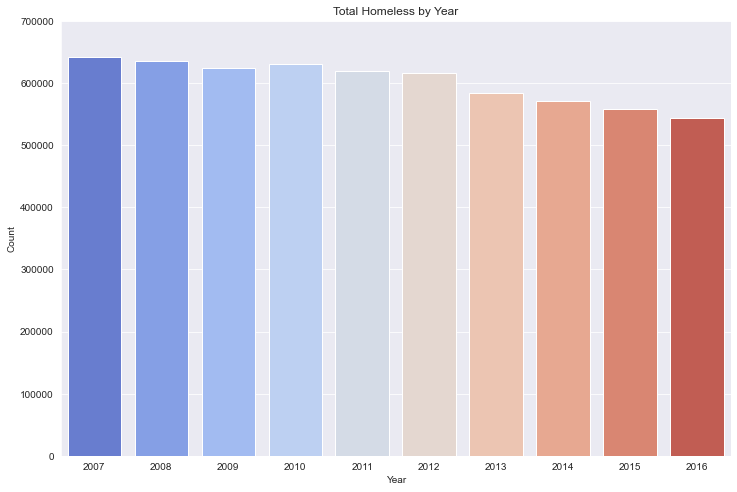

In [27]:
#Set the Seaborn style to darkgrid
sns.set_style('darkgrid')

#Create a figure and set the size.
plt.subplots(figsize=(12,8))

#Create a barplot to show the Total Homeless count by year
sns.barplot(x='Year', y='Count', data=yeartotal, palette='coolwarm')

#Create the Title
plt.title('Total Homeless by Year')

#Set the Y limit to 700,000 so we can see the highest values.
plt.ylim(0,700000)


In [28]:
#Create a interactive plot to show the change in Total Homeless from 2007 to 2016.
yeartotal.iplot(x='Year',y='Count',xTitle='Year',yTitle='Count', color='blue')

### Conclusion: From the two graphs above we see a steady decrease from 2007 to 2016.

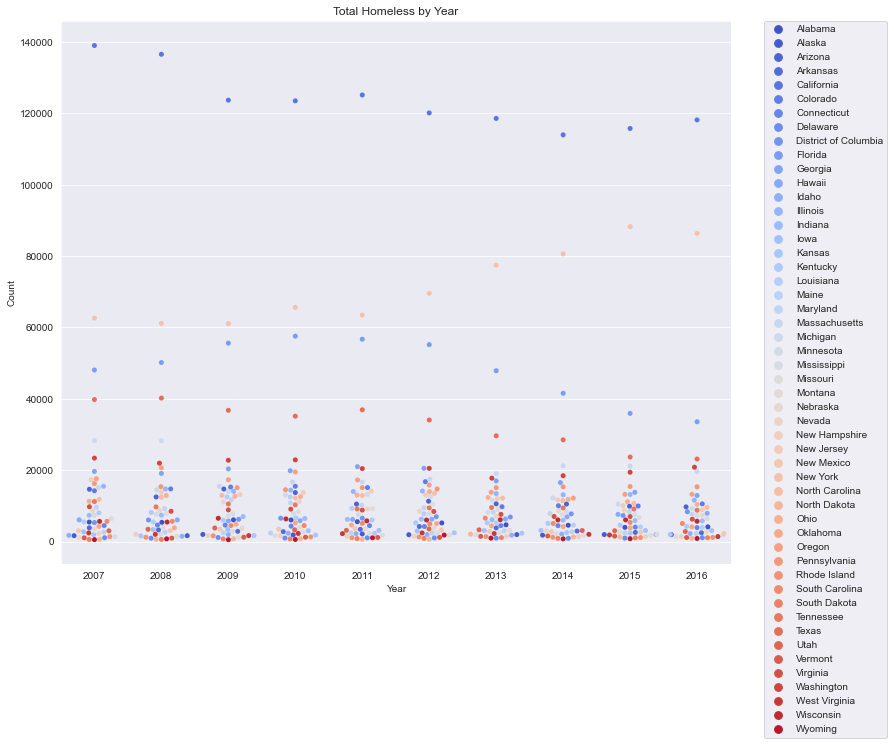

In [29]:
#Create a swarmplot to compare the different states by year.

#Create a dataframe that gets the Total Homeless sum per state and year.
swarm=homeless[homeless['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum()
#Reset the index. 
swarm.reset_index(inplace=True)

#Create the plot and set the size.
plt.subplots(figsize=(12,10))
#Make the swarmplot using the Year for the X data and Count for the Y data.
sns.swarmplot(x="Year", y="Count",hue='State',data=swarm,palette='coolwarm')
#Set the title
plt.title('Total Homeless by Year')
#Set the legend to be away from the main plot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Conclusion: We see that California, New York, Florida, and Texas have a much higher homeless population.

In [30]:
#Create a dataframe that gives the total homeless sum for each state per year.
styeartotal = homeless[homeless['Measures']=='Total Homeless'].groupby(['State', 'Year'])[['Count']].sum()
#Reset the index.
styeartotal.reset_index(inplace=True)

In [31]:
styeartotal.head()

,State,Year,Count
0,Alabama,2007,5452
1,Alabama,2008,5387
2,Alabama,2009,6080
3,Alabama,2010,6046
4,Alabama,2011,5558


In [32]:
#Create a dataframe of the Homeless Total for just the years 2016 and 2007. 
years=styeartotal[(styeartotal['Year']==2016)|(styeartotal['Year']==2007)]
years.head()

,State,Year,Count
0,Alabama,2007,5452
9,Alabama,2016,4111
10,Alaska,2007,1642
19,Alaska,2016,1940
20,Arizona,2007,14646


In [33]:
#Find the difference between the two years per state and create a column.
diff=years.groupby('State')[['Count']].diff().fillna(0)
diff.columns=['Difference']


In [34]:
#Join together the year totals and differences.
diffyears = diff.join(years)

In [35]:
#Create a dataframe with everything combined. 
totaldiffyears = diffyears.groupby('State')['Difference'].sum()
totaldiffyears.head()

State
Alabama       -1341.0
Alaska          298.0
Arizona       -4939.0
Arkansas      -1373.0
California   -20844.0
Name: Difference, dtype: float64

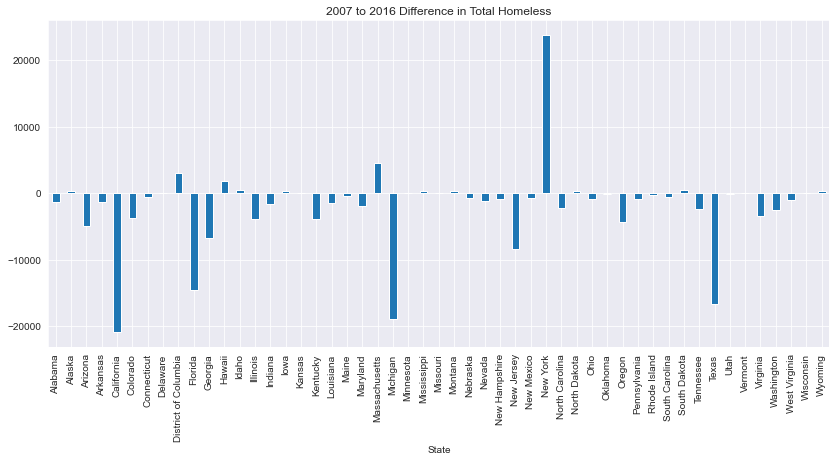

In [36]:
#Create a graph to show the difference between 2007 and 2016 in Total Homeless.

#Create a barplot.
totaldiffyears.plot.bar(figsize=(14,6))
#Set the title.
plt.title('2007 to 2016 Difference in Total Homeless')
plt.show()

### Conclusion: We see that California, Florida, Michigan, and Texas homeless population decreased, whereas New York's increased by quite a lot. 

In [37]:
#Create layout.
layout = cf.Layout(
    height=1000,
    width=1000)

#Assign values to the figure, change the colorscale, and set the layout.
fig = go.Figure(data=go.Heatmap(
        z=styeartotal['Count'],
        x=styeartotal['Year'],
        y=styeartotal['State'],
        colorscale='balance'),
        layout=layout)

#Set the states to be in alphabetical order.
fig.update_yaxes(autorange="reversed")

#Set the title and position it. 
fig.update_layout(
    title={
        'text': "2007 to 2016 Total Homeless Count",
        'y':.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


### Conclusion: California has the highest Total Homeless, however the number did decrease from 2007 to 2016. Florida, New York, Texas, and Washington also have a notable Total Homeless count.

In [38]:
#Create a dataframe with only certain measures.
measures=homeless[homeless['Measures'].str.contains('Unsheltered Homeless Individuals|Unsheltered Homeless People in Families|Sheltered Homeless Individuals|Sheltered Homeless People in Families')]


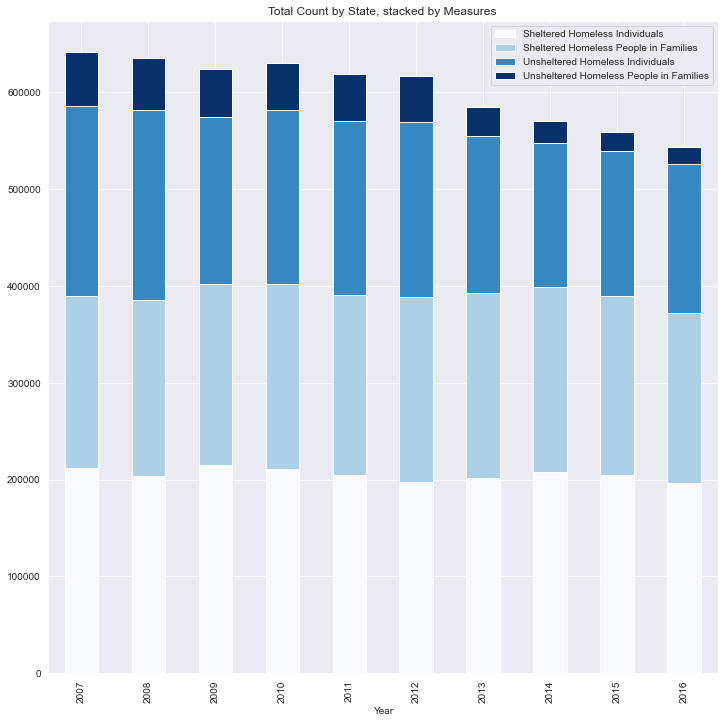

In [39]:
#Get the total per measure for each year and stack them.
measures.groupby(['Year', 'Measures'])['Count'].sum().unstack().plot.bar(stacked=True,title='Total Count by State, stacked by Measures', colormap='Blues', figsize=(12,12));
#Move the legend to the upper right corner.
plt.legend(loc='upper right')



### Conclusion: Sheltered and unsheltered homeless individuals are larger in total the sheltered and unsheltered people in families. 

In [40]:
#Create a copy of the homeless dataframe to investigate the Veterans homeless population.
vets=homeless.copy()


In [41]:
#We want the dataframe to select Homeless Veterans and groupby Year and Count to get the sum.
vets2=vets[vets['Measures']=='Homeless Veterans'].groupby(['Year'])[['Count']].sum()
#Reset the index.
vets2.reset_index(inplace=True)
vets2.head()

,Year,Count
0,2011,65253
1,2012,60399
2,2013,55472
3,2014,49534
4,2015,47504


Note that the year starts at 2011 and not 2007. This is because data for veterans wasn't collected until 2011.

In [42]:
#Create a new dataframe that adds the Total Homeless count. 
vets3=pd.merge(vets2,yeartotal,on='Year')


In [43]:
vets3.head()

,Year,Count_x,Count_y
0,2011,65253,618611
1,2012,60399,616556
2,2013,55472,584483
3,2014,49534,570514
4,2015,47504,558573


In [44]:
#Rename the columns.
vets3.rename(columns={'Count_x':'Veterans','Count_y':'Total'},inplace=True)
vets3.head()

,Year,Veterans,Total
0,2011,65253,618611
1,2012,60399,616556
2,2013,55472,584483
3,2014,49534,570514
4,2015,47504,558573


In [45]:
#Find what percentage of veterans make up the Total Homeless count. 
Percent=((vets3['Veterans']/vets3['Total']*100)).round(2)

In [46]:
#Create a percent column.
vets3['Percent']=Percent

In [47]:
vets3.head(6)

,Year,Veterans,Total,Percent
0,2011,65253,618611,10.55
1,2012,60399,616556,9.80
2,2013,55472,584483,9.49
3,2014,49534,570514,8.68
4,2015,47504,558573,8.50
5,2016,39272,544084,7.22


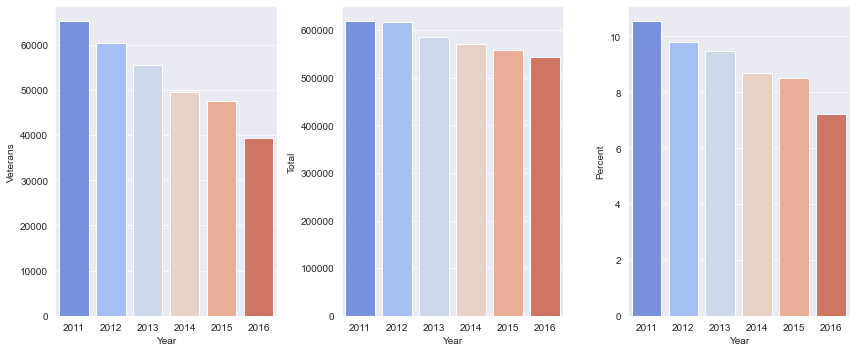

In [48]:
#Create the figure, subplot with rows and columns, and the figure size.
fig,ax=plt.subplots(nrows=1, ncols=3, figsize=(12,5))

#Create the barplot for Veterans per year.
sns.barplot(x='Year', y='Veterans', data=vets3, palette='coolwarm',ax=ax[0]),
#Create the barplot for Total Homeless per year.
sns.barplot(x='Year', y='Total', data=vets3, palette='coolwarm',ax=ax[1]),
#Create the barplot for the percent of veterans per year.
sns.barplot(x='Year', y='Percent', data=vets3, palette='coolwarm',ax=ax[2])

#Set a tight layout for readability.
fig.tight_layout()

In [49]:
#Create an interactive plot to show the change in percentage of homeless veterans. 
vets3.iplot(x='Year',y='Percent',xTitle='Year',yTitle='Count',color='blue')

### Conclusion: Both the Total Homeless and homeless veterans population is decreasing, because of this, the veterans percentage is decreasing. 

In [50]:
#Group each states total for the year 2016.
total2016=styeartotal[styeartotal['Year']==2016]


In [51]:
#Get the states total and rank them from highest to lowest for 2016.
s_total = total2016.groupby(['State'])['Count'].max()
#Reset the index.
s_total= s_total.sort_values(ascending=False)


In [52]:
s_total.head()

State
California    118142
New York       86352
Florida        33559
Texas          23122
Washington     20827
Name: Count, dtype: int64

In [53]:
#Make s_total a dataframe.
totalhomeless = pd.DataFrame(s_total)
totalhomeless.reset_index(inplace=True)


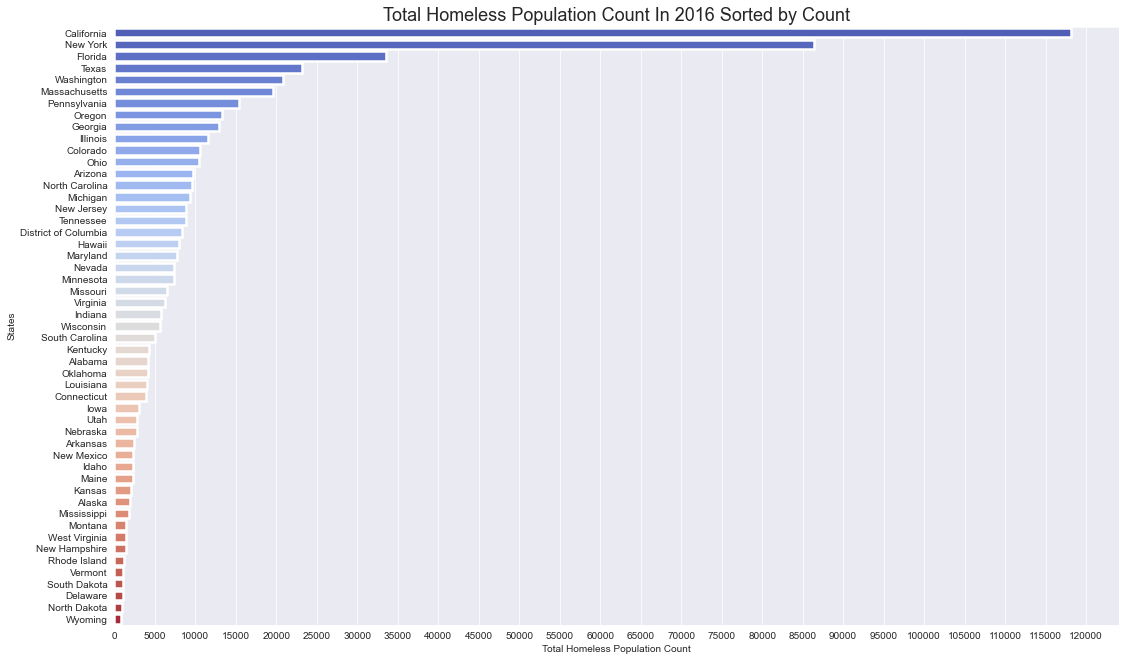

In [54]:
#Create a figure and set the size.
f,ax = plt.subplots(figsize=(18,11))

#Create a barplot for Total Homeless per state in 2016.
sns.barplot(x='Count',y='State',data=totalhomeless,lw =2.5,palette='coolwarm');
#Set the x and y labels.
ax.set(ylabel='States',xlabel= 'Total Homeless Population Count',);
#Set the title.
plt.title('Total Homeless Population Count In 2016 Sorted by Count',fontsize=(18));
#Change the x axis ticks.
major_ticks = np.arange(0, 125000, 5000)
plt.xticks(major_ticks);


In [55]:
#Create a dataframe with the CoC names and numbers with Total Homeless count.
coc=homelesscoc[homelesscoc['Measures']=='Total Homeless']

In [56]:
coc.head()

,Year,State,CoC Number,CoC Name,Measures,Count
31,2007,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Total Homeless,2104
43,2007,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Total Homeless,649
55,2007,Alabama,AL-502,Florence/Northwest Alabama CoC,Total Homeless,265
67,2007,Alabama,AL-503,Huntsville/North Alabama CoC,Total Homeless,830
79,2007,Alabama,AL-504,Montgomery City & County CoC,Total Homeless,456


In [57]:
#Create a pivot table with CoC name, state, and measure by count
cocpivot=pd.pivot_table(coc,index=['CoC Name','State','Measures'], values=['Count'])

cocpivot = pd.DataFrame(cocpivot)
#Reset the index. 
cocpivot.reset_index(inplace=True)

#Set the ascending false so we get the CoC with the highest count at the top. 
cocpivot.sort_values(by=['Count'],ascending=False).head()

,CoC Name,State,Measures,Count
250,New York City CoC,New York,Total Homeless,59167.4
196,Los Angeles City & County CoC,California,Total Homeless,38333.0
367,Texas Balance of State (BoS) CoC,Texas,Total Homeless,11695.2
335,Seattle/King County CoC,Washington,Total Homeless,9115.5
134,Georgia Balance of State CoC,Georgia,Total Homeless,8815.9


In [58]:
#Create a dataframe from the pivot table with CoC with highest count first.
pivot2=cocpivot.sort_values(by=['Count'],ascending=False).copy().head()

In [59]:
pivot2.head()

,CoC Name,State,Measures,Count
250,New York City CoC,New York,Total Homeless,59167.4
196,Los Angeles City & County CoC,California,Total Homeless,38333.0
367,Texas Balance of State (BoS) CoC,Texas,Total Homeless,11695.2
335,Seattle/King County CoC,Washington,Total Homeless,9115.5
134,Georgia Balance of State CoC,Georgia,Total Homeless,8815.9


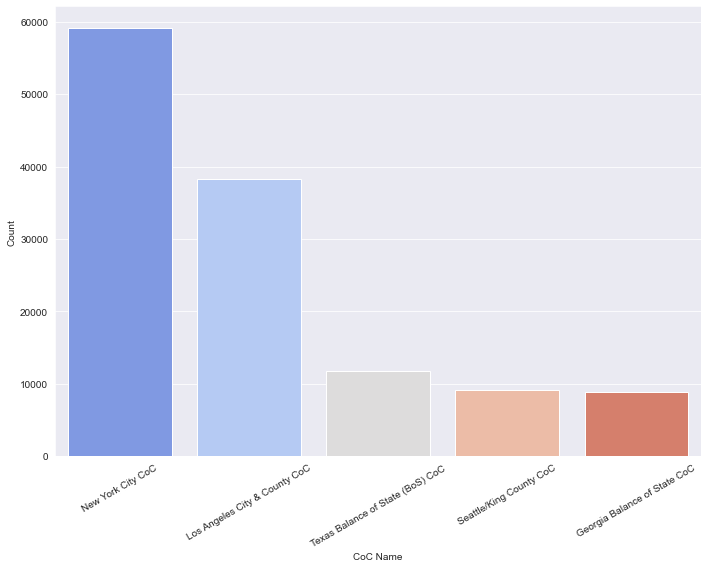

In [60]:
#Create figure and set its size.
plt.subplots(figsize=(10,8))

#Create barplot by CoC name and count
sns.barplot(x='CoC Name', y='Count', data=pivot2, palette='coolwarm')
plt.xticks(rotation=30)
plt.tight_layout()

In [61]:
#Sort state total to get states with highest count first.
yearstatetotal=homeless[homeless['Measures']=='Total Homeless'].groupby(['State'])[['Count']].sum()
yearstatetotal.head()

,Count
State,
Alabama,51063
Alaska,18810
Arizona,118032
Arkansas,32114
California,1234285


### Conclusion: The top CoC's are located in NY, CA, TX, WA, and GA. This is reflected by the states with the highest in Total Homeless being CA, NY, FL, TX, and WA. 

In [62]:
#Create a dataframe with the states with the lowest total homeless count
lowest=yearstatetotal.sort_values(by=['Count'],ascending=True).head()
lowest.reset_index(inplace=True)

In [63]:
lowest.head()

,State,Count
0,South Dakota,8392
1,Wyoming,8598
2,North Dakota,9669
3,Delaware,10019
4,Vermont,12380


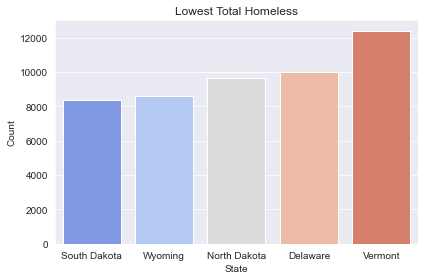

In [64]:
#Create barplot by state and count
sns.barplot(x='State', y='Count', data=lowest, palette='coolwarm')
plt.title('Lowest Total Homeless')
plt.tight_layout()

### Conclusion: South Dakota, Wyoming, North Dakota, Delaware, and Vermont are the states with the lowest total homeless counts.

# Descriptive Statistics

In [65]:
#Get the descriptive info for each year
yeartotal.groupby('Year').describe()


Count                                                                
     count      mean std       min       25%       50%       75%       max
Year                                                                      
2007   1.0  641665.0 NaN  641665.0  641665.0  641665.0  641665.0  641665.0
2008   1.0  635445.0 NaN  635445.0  635445.0  635445.0  635445.0  635445.0
2009   1.0  624598.0 NaN  624598.0  624598.0  624598.0  624598.0  624598.0
2010   1.0  630806.0 NaN  630806.0  630806.0  630806.0  630806.0  630806.0
2011   1.0  618611.0 NaN  618611.0  618611.0  618611.0  618611.0  618611.0
2012   1.0  616556.0 NaN  616556.0  616556.0  616556.0  616556.0  616556.0
2013   1.0  584483.0 NaN  584483.0  584483.0  584483.0  584483.0  584483.0
2014   1.0  570514.0 NaN  570514.0  570514.0  570514.0  570514.0  570514.0
2015   1.0  558573.0 NaN  558573.0  558573.0  558573.0  558573.0  558573.0
2016   1.0  544084.0 NaN  544084.0  544084.0  544084.0  544084.0  544084.0

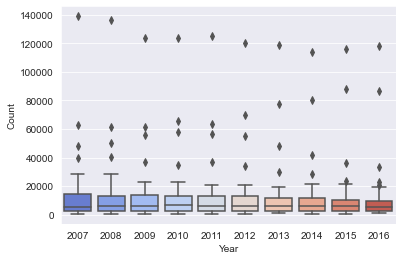

In [66]:
#Boxplot for year and count
sns.boxplot(x='Year',y='Count',data=styeartotal,palette='coolwarm')


In [67]:
#Display the state and year total dataframe
styeartotal.head()

,State,Year,Count
0,Alabama,2007,5452
1,Alabama,2008,5387
2,Alabama,2009,6080
3,Alabama,2010,6046
4,Alabama,2011,5558


In [68]:
#We're now going to create a dataframe with Total Homeless for every year from 2007 to 2016 for each state.
statetotal = homeless[homeless['Measures']=='Total Homeless'].groupby(['State'])[['Count']].sum()
#Reset index.
statetotal.reset_index(inplace=True)


In [69]:
statetotal.head()

,State,Count
0,Alabama,51063
1,Alaska,18810
2,Arizona,118032
3,Arkansas,32114
4,California,1234285


In [70]:
#Now we are going to add a region column to the count. 
#We are going to use the regions as listed here: https://www.google.com/search?q=united+states+regions&sxsrf=ALeKk01gPlRMWoFVyL4YvuoaSQCUg2APqw:1607315074266&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjrnqygg7vtAhXRvp4KHT8SCFQQ_AUoAXoECBgQAw&biw=1440&bih=798#imgrc=gWgB91mLBPbc4M

#Create a column called region
statetotal['Region']=['']*statetotal.shape[0]

#Assign the states to the appropriate region.
Pacific={'Washington','Oregon','California'}
Southwest={'Arizona','New Mexico','Texas','Oklahoma'}
RockyMtns={'Nevada','Utah','Colorado','Idaho','Montana','Wyoming'}
Midwest={'North Dakota','South Dakota','Nebraska','Kansas','Minnesota',
        'Iowa','Missouri','Wisconsin','Illinois','Michigan','Indiana','Ohio'}
Southeast={'Arkansas','Louisiana','Kentucky','Tennessee','Mississippi',
          'Alabama','Delaware','Maryland','District of Columbia','West Virginia','Virginia',
          'North Carolina','South Carolina','Georgia','Florida'}
Northeast={'Maine','New Hampshire','Vermont','Massachusetts','New York',
          'Connecticut','Rhode Island','Pennsylvania','New Jersey'}
Noncontiguous={'Alaska','Hawaii'}

#States that fall into each region will be listed as such.
for State in statetotal['State']:
    if State in Pacific:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Pacific'
    elif State in Southwest:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Southwest'
    elif State in RockyMtns:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='RockyMtns'
    elif State in Midwest:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Midwest'
    elif State in Southeast:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Southeast'
    elif State in Northeast:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Northeast'
    elif State in Noncontiguous:
        statetotal.loc[[statetotal[statetotal['State']==State].index[0]],'Region']='Noncontiguous'


In [71]:
statetotal.head()

,State,Count,Region
0,Alabama,51063,Southeast
1,Alaska,18810,Noncontiguous
2,Arizona,118032,Southwest
3,Arkansas,32114,Southeast
4,California,1234285,Pacific


In [72]:
#Get the mean of each region.
regionmean=statetotal.groupby('Region').mean()
regionmean

,Count
Region,
Midwest,66475.250000
Noncontiguous,41892.500000
Northeast,142556.888889
Pacific,534415.000000
RockyMtns,49570.500000
Southeast,95989.666667
Southwest,130080.500000


In [73]:
#Describe the info by region.
statetotal.groupby('Region').describe()

Count                                                     \
              count           mean            std       min        25%   
Region                                                                   
Midwest        12.0   66475.250000   49571.440099    8392.0   28402.50   
Noncontiguous   2.0   41892.500000   32643.584553   18810.0   30351.25   
Northeast       9.0  142556.888889  224649.038752   12380.0   16085.00   
Pacific         3.0  534415.000000  606576.387515  160576.0  184480.00   
RockyMtns       6.0   49570.500000   49689.550120    8598.0   16737.50   
Southeast      15.0   95989.666667  115382.556804   10019.0   41588.50   
Southwest       4.0  130080.500000  137275.845845   30283.0   40776.25   

                                               
                    50%        75%        max  
Region                                         
Midwest         62020.0   89879.00   152969.0  
Noncontiguous   41892.5   53433.75    64975.0  
Northeast       43542.0  152221.00   716032.0  
Pacific        208384.0  721334.50  1234285.0  
RockyMtns       26067.0   74896.00   131891.0  
Southeast       67892.0   95149.50   482097.0  
Southwest       81153.0  170457.25   327733.0

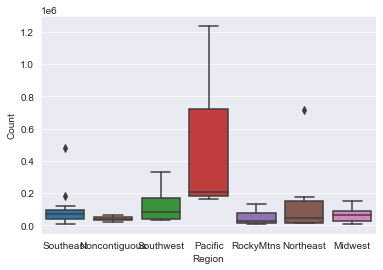

In [74]:
#Create a boxplot for the regions
sns.boxplot(x='Region',y='Count',data=statetotal)

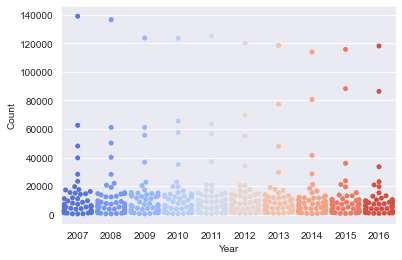

In [75]:
#Swarmplot for year and count
sns.swarmplot(x='Year',y='Count',data=styeartotal,palette='coolwarm')

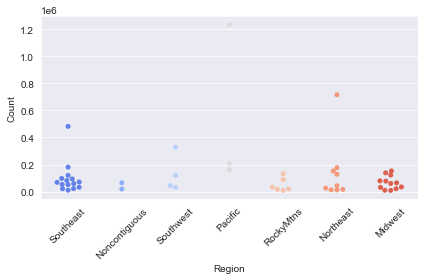

In [76]:
#Swarmplot for region
sns.swarmplot(x='Region',y='Count',data=statetotal,palette='coolwarm')
plt.xticks(rotation=45)
plt.tight_layout()

### ECDF

In [77]:
#We are going to create the ECDFs for the 3 most recent years.

#We're going to generate a dataframe for each year.
total14=styeartotal.loc[styeartotal['Year']==2014]
total15=styeartotal.loc[styeartotal['Year']==2015]
total16=styeartotal.loc[styeartotal['Year']==2016]

total16.head()

,State,Year,Count
9,Alabama,2016,4111
19,Alaska,2016,1940
29,Arizona,2016,9707
39,Arkansas,2016,2463
49,California,2016,118142


In [78]:
#We will create a function that will return x and y values on passing it in the data frame as data argument

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n=len(data)
    
    # x-data for the ECDF: x
    x=np.sort(data)
    
     # y-data for the ECDF: y
    y=np.arange(1,n+1)/n
    
    return x,y

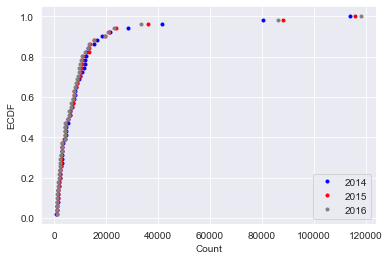

In [79]:
#Compute ECDFs passing the different data for each year

#Compute x, y for each year by calling the ECDF function and passing each dataframe
x14, y14 = ecdf(total14['Count'])
x15, y15 = ecdf(total15['Count'])
x16, y16 = ecdf(total16['Count'])

#Plot all ECDFs on the same plot
_ = plt.plot(x14, y14, marker = '.', linestyle = 'none',color='blue')
_ = plt.plot(x15, y15, marker = '.', linestyle = 'none',color='red')
_ = plt.plot(x16, y16, marker = '.', linestyle = 'none',color='gray')

#Annotate the plot
plt.legend(('2014', '2015', '2016'), loc='lower right')
_ = plt.xlabel('Count')
_ = plt.ylabel('ECDF')

plt.show()

# Quantitative Data Exploratory Descriptive Statistics

In [80]:
styeartotal.groupby('State').corr().head(20)

Year     Count
State                                         
Alabama              Year   1.000000 -0.837322
                     Count -0.837322  1.000000
Alaska               Year   1.000000  0.462261
                     Count  0.462261  1.000000
Arizona              Year   1.000000 -0.873021
                     Count -0.873021  1.000000
Arkansas             Year   1.000000 -0.396138
                     Count -0.396138  1.000000
California           Year   1.000000 -0.881856
                     Count -0.881856  1.000000
Colorado             Year   1.000000 -0.719021
                     Count -0.719021  1.000000
Connecticut          Year   1.000000 -0.768579
                     Count -0.768579  1.000000
Delaware             Year   1.000000 -0.270304
                     Count -0.270304  1.000000
District of Columbia Year   1.000000  0.950827
                     Count  0.950827  1.000000
Florida              Year   1.000000 -0.700984
                     Count -0.700984  1.000000

In [81]:
#Calculate the Pearson Coefficient and P-value for Veterans
coef,p_value=stats.pearsonr(vets3['Veterans'],vets3['Total'])
print('Pearson Correlation Coefficient is: ',coef)
print('P-value coefficient is ',p_value)

Pearson Correlation Coefficient is:  0.9757282657064472
P-value coefficient is  0.0008765261817402973


### Conclusion: With a p-value of less than 0.05 is statistically significant and indicates strong evidence against the null hypothesis. A Pearson correlation coefficient of .97 means there is a very high positive correlation. 

### Hypothesis Testing

Ho: The Total Homeless is the same in each region
Ha: The Total Homeless different in each region.

In [82]:
#F-test for region
ftest,pval=stats.f_oneway(statetotal[statetotal['Region']=='Pacific']['Count'],
                         statetotal[statetotal['Region']=='Southwest']['Count'],
                         statetotal[statetotal['Region']=='RockyMtns']['Count'],
                         statetotal[statetotal['Region']=='Midwest']['Count'],
                         statetotal[statetotal['Region']=='Southeast']['Count'],
                         statetotal[statetotal['Region']=='Northeast']['Count'],
                         statetotal[statetotal['Region']=='Noncontiguous']['Count'])
print('P value',pval)


P value 0.012392329667243508


### Conclusion: With a p-value of 0.012, we can accept that the difference between the regions are moderately significat against the null hypothesis in favor for the alternative.

# Conclusion

What is the overall trend from 2007 to 2016 in terms of total homeless?
	From 2007 to 2016 total homelessness went down ~100,000.
    
What states have higher levels of homelessness?
	California, New York, Florida, Texas, and Washington have some of the highest levels of homelessness. 

What states have lower levels of homelessness?
    South Dakota, Wyoming, North Dakota, Delaware, and Vermont are the states with the lowest total homeless counts.
    
    
What states saw growth in homelessness over the years?
    New York state saw the largest growth in homelessness. Massachusetts and DC also saw significant growth.
    
What states saw a decrease in homelessness over the years?
     California and Michigan saw the largest decrease in homelessness. Florida, New Jersey, and Texas also saw notable decreases.
     
Did more homeless people tend to be individuals or in families? 
	There were more homeless individuals than those in families.
    
What did homelessness look for veterans over the years?
    Homelessness for veterans steadily decreased over the years from 10.55 in 2011 to 7.22 in 2016, a 3.33 decrease. 

What did 2016 look like in terms of homelessness?
	The highest 3 states were California, New York, and Florida. The lowest 3 were Delaware, North Dakota, and Wyoming.
    
Did the CoC’s with highest homelessness reflect the states with the highest homelessness? 
	Yes, the CoC with the highest homeless were New York City, Los Angeles, and Texas Balance of State. The 3 states these CoC’s are in also have highest 
amounts of homelessness. 
